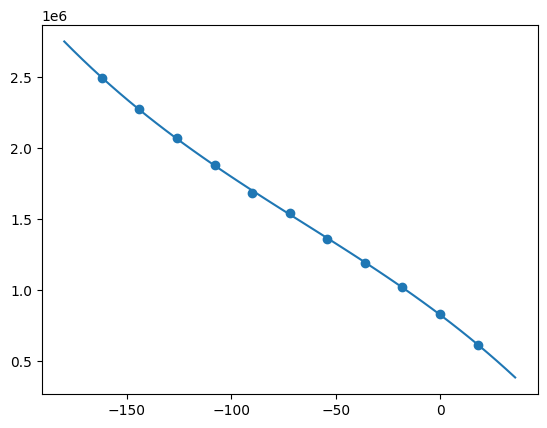

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

x = numpy.linspace(-180, 36)

servo_angle_pws = [
    [-162, 2490000],
    [-144, 2270000],
    [-126, 2070000],
    [-108, 1880000],
    [ -90, 1680000],
    [ -72, 1540000],
    [ -54, 1360000],
    [ -36, 1190000],
    [ -18, 1020000],
    [   0,  830000],
    [  18,  610000],
]

# for i in range(len(servo_1_array))[1:]:
#     print("Using %s terms" %i)
               
servo_array = numpy.array(servo_angle_pws)
angles_to_pw = numpy.poly1d(
    numpy.polyfit(
        servo_array[:,0],
        servo_array[:,1],
        3  # try different values to see how more/fewer terms in the polynomial function affect results
    )
)

plt.plot(x, angles_to_pw(x))
x, y = servo_array.T
plt.scatter(x, y)

In [ ]:
len(servo_1_array)

In [4]:
def interval_mapping(x, in_min, in_max, out_min, out_max):
    """
    Maps a value from one range to another.
    This function is useful for converting servo angle to pulse width.
    """
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

In [22]:
interval_mapping( 144,0, 180, 0.5, 2.5)
## duty_ns entspricht hier den Pulsewidth

2.1

In [1]:
def servo_write(angle):
    pulse_width = interval_mapping(angle, 0, 180, 0.5, 2.5)
    duty = int(interval_mapping(pulse_width, 0, 20, 0, 65535))
    return duty
   # pin.duty_u16(duty)

In [16]:
servo_write(162)

7536

In [ ]:
from brachiograph import BrachioGraph

bg = BrachioGraph(turtle=True)
bg.status()



In [ ]:
bg.box(bounds=[-3, 6, 3, 12])